#Import Libraries

In [25]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

from google.colab import drive

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
TensorFlow Version :2.1.0-rc1
NumPy Version :1.17.4
Matplotlib Version :3.1.2


In [0]:
drive.mount('/content/drive')

data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

['bookshelves' 'fireplace' 'floor lamp' 'chair' 'entertainment center'
 'dressing table' 'bed' 'curtain' 'sofa' 'table']


# Load Function

In [0]:
def plot_loss():

    loss = history.history['loss']
    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 1, 1)
    plt.title('Validation Loss & Training Loss')
    plt.semilogy(epochs, history.history['val_loss'], 'b', label='CNN')
    plt.semilogy(epochs, history.history['loss'], 'b', label='CNN')
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    #plt.ylim([0.0, 0.6])
    plt.legend(loc='best')

    plt.show()

def plot_acc():

    loss = history.history['loss']
    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(10, 10))
    plt.subplot(1,1,1)
    plt.title('Validation Accuray & Training Accuracy')
    plt.semilogy(epochs, history.history['val_accuracy'], 'b', label='CNN')
    plt.semilogy(epochs, history.history['accuracy'], 'b', label='CNN')
    plt.grid(True)
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 0.9])
    plt.legend(loc='best')
    plt.show()

In [0]:
def generate_data(data_path, img_size=224, batch_n=180):

    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                #horizontal_flip=True, 
                                #vertical_flip=True,
                                #rotation_range=30,
                                zoom_range=0.1,
                                brightness_range=[0.8,1.2],
                                validation_split=0.2,
                                rescale=1./255)
    
    train_data_generate = image_generator.flow_from_directory(
                                directory=str(data_path),
                                batch_size=batch_n,
                                shuffle=True,
                                target_size=(img_size, img_size),
                                classes = list(class_name),
                                subset='training')
    
    test_data_generate = image_generator.flow_from_directory(
                                directory=str(data_path),
                                batch_size=batch_n,
                                shuffle=True,
                                target_size=(img_size, img_size),
                                classes = list(class_name),
                                subset='validation')
    
    return train_data_generate, test_data_generate


# Prepare Data

- **Unzip Data**

In [64]:
import os

cwd = os.getcwd()
print(cwd)

!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip -d /content/furniture
!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/room.zip -d /content

/content
Archive:  /content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip
replace /content/furniture/bed/bed (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/furniture/bed/bed (1).jpg  
  inflating: /content/furniture/bed/bed (10).jpg  
  inflating: /content/furniture/bed/bed (100).jpg  
  inflating: /content/furniture/bed/bed (1000).jpg  
  inflating: /content/furniture/bed/bed (1001).jpg  
  inflating: /content/furniture/bed/bed (1002).jpg  
  inflating: /content/furniture/bed/bed (1003).jpg  
  inflating: /content/furniture/bed/bed (1004).jpg  
  inflating: /content/furniture/bed/bed (1005).jpg  
  inflating: /content/furniture/bed/bed (1006).jpg  
  inflating: /content/furniture/bed/bed (1007).jpg  
  inflating: /content/furniture/bed/bed (1008).jpg  
  inflating: /content/furniture/bed/bed (1009).jpg  
  inflating: /content/furniture/bed/bed (101).jpg  
  inflating: /content/furniture/bed/bed (1010).jpg  
  inflating: /content/furni

In [0]:
data_path = pathlib.Path('/content/furniture')
class_name = np.array(['bed', 'sofa', 'fireplace', 'chair', 'floor lamp', 'dressing table', 'curtain','table','entertainment center','bookshelves'])

#ImageGenerator

In [28]:
img_size =  224
batch_n = 120

data_path = pathlib.Path('/content/furniture')
train_data_generate, test_data_generate = generate_data(data_path, img_size, batch_n)

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.


#Load Inception

import model

In [0]:
import tensorflow.keras.applications.inception_v3 as incep

model_incep = incep.InceptionV3(
    weights="imagenet", 
    input_tensor=tf.keras.layers.Input(shape=(img_size, img_size, 3))
)

model_incep.summary()

96116736/96112376 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

##fine tuning

In [0]:
epoch_n = 80

make ai-kea model

In [0]:
#inputs = model_incep.inputs
#print(inputs[0])
inputs = model_incep.get_layer('mixed7').output
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', name='conv_feat')(inputs) 
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x) 
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x) 
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x) 
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x) 
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', name='conv_fddea')(x) 
x = tf.keras.layers.BatchNormalization(momentum=0.85)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x) 

aikea_model = tf.keras.Model(inputs=model_incep.inputs, outputs=outputs, name='grad_model')

aikea_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

aikea_model.summary()

Model: "grad_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint as mcp

checkpoint = mcp('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/googlenet_master_01_sey.h5',
                 monitor="val_accuracy", mode="max",
                 save_best_only=True)

history = aikea_model.fit_generator(
                train_data_generate,
                epochs = epoch_n,
                validation_data = test_data_generate,
                callbacks=[checkpoint,])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 105 steps, validate for 27 steps
Epoch 1/80
105/105 [==============================] - 225s 2s/step - loss: 1.2720 - accuracy: 0.5834 - val_loss: 3.4826 - val_accuracy: 0.3129
Epoch 2/80
105/105 [==============================] - 211s 2s/step - loss: 0.6666 - accuracy: 0.8003 - val_loss: 49.0073 - val_accuracy: 0.5754
Epoch 3/80
105/105 [==============================] - 211s 2s/step - loss: 0.6875 - accuracy: 0.8084 - val_loss: 15.2012 - val_accuracy: 0.2577
Epoch 4/80
105/105 [==============================] - 211s 2s/step - loss: 0.5513 - accuracy: 0.8372 - val_loss: 2.8825 - val_accuracy: 0.6482
Epoch 5/80
105/105 [==============================] - 209s 2s/step - loss: 0.5507 - accuracy: 0.8468 - val_loss: 5.3685 - val_accuracy: 0.4651
Epoch 6/80
105/105 [==============================] - 213s 2s/step - loss: 0.4805 - accuracy: 0.8584 - val_loss: 0

In [0]:
grad_model = tf.keras.models.Model(
    [model_incep.inputs],                           # input: vgg16 inputs
    [aikea_model.get_layer('conv_fddea').output,  # outputs: vgg16 last conv
     aikea_model.output]                           # softmax out
)
print(grad_model)

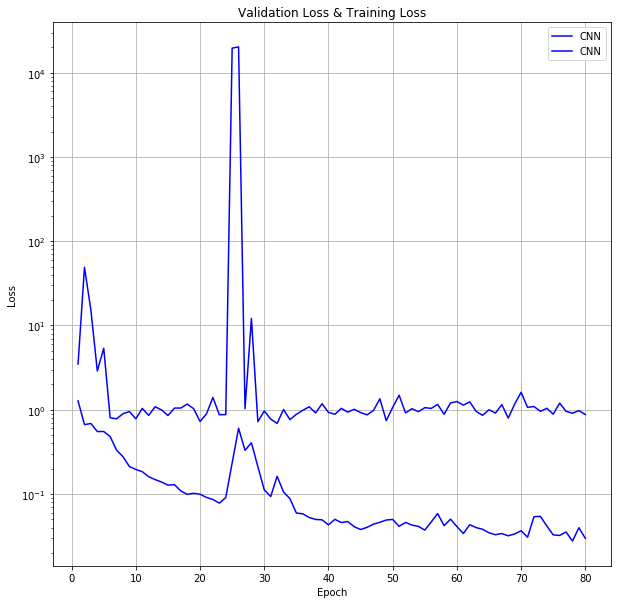

In [0]:
plot_loss()

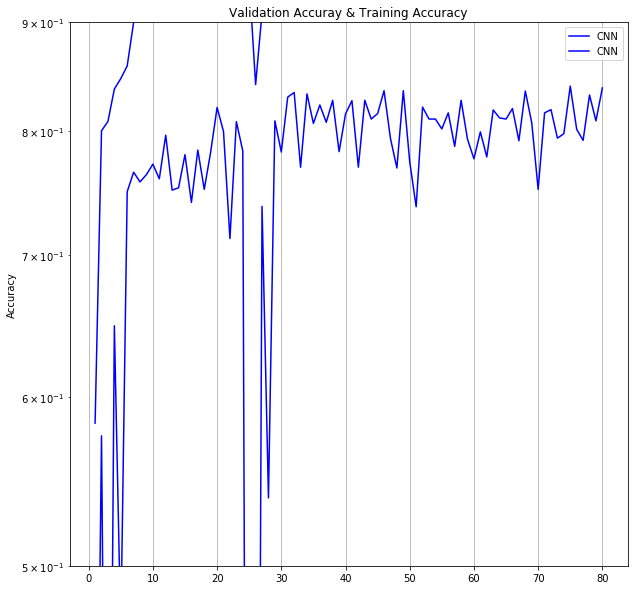

In [0]:
plot_acc()

In [0]:
def save_model(date, epoch, model_name, num):
    aikea_model.save(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))

In [0]:
save_path = '/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/'

In [0]:
save_model("day2", 20, "GoogLeNet", "master_01_sey")

# Load Prev Model

In [0]:
def load_models(date, epoch, model_name, num):
  model = tf.keras.models.load_model(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))
  return model

In [0]:
save_path = '/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/'
prev_ai_kea = load_models("day2", 20, "GoogLeNet", "master_01_sey")

In [0]:
prev_ai_kea.summary()

prev_ai_kea.get_layer('mixed7').output

Model: "grad_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

<tf.Tensor 'mixed7_1/Identity:0' shape=(None, 12, 12, 768) dtype=float32>

# Training

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint as mcp

epoch_n = 30
img_size = 224
batch_n = 150
data_path = pathlib.Path('/content/furniture')

train_data_generate, test_data_generate = generate_data(data_path, img_size, batch_n)

checkpoint = mcp('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/googlenet_master_01_sey.h5',
                 monitor="val_accuracy", mode="max",
                 save_best_only=True)

history = prev_ai_kea.fit_generator(
                train_data_generate,
                epochs = epoch_n,
                validation_data = test_data_generate,
                callbacks=[checkpoint,])

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 84 steps, validate for 21 steps
Epoch 1/30
84/84 [==============================] - 227s 3s/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.9707 - val_accuracy: 0.8140
Epoch 2/30
84/84 [==============================] - 218s 3s/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.9849 - val_accuracy: 0.8121
Epoch 3/30
84/84 [==============================] - 220s 3s/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.8592 - val_accuracy: 0.8249
Epoch 4/30
84/84 [==============================] - 219s 3s/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.9204 - val_accuracy: 0.8303
Epoch 5/30
84/84 [==============================] - 217s 3s/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 1.4708 - val_accuracy: 0.7955
Epoch 6/30
84/84 [==============================] - 219s 3s/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.802

> ### Filter Map

In [0]:
# aikea_day2_20_GoogLeNet_00
def save_model(date, epoch, model_name, num):
    prev_ai_kea.save(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))

save_model("day2", 20, "GoogLeNet", "master_01-1_sey")

In [0]:
prev_ai_kea = tf.keras.models.load_model(save_path + "googlenet_master_00_lsy1.h5")

In [30]:
history = prev_ai_kea.fit_generator(
                train_data_generate,
                epochs = 1,
                validation_data = test_data_generate)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 105 steps, validate for 27 steps
105/105 [==============================] - 219s 2s/step - loss: 0.0415 - accuracy: 0.9876 - val_loss: 1.2590 - val_accuracy: 0.7904


In [49]:
prev_ai_kea.summary()

Model: "grad_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

In [48]:
# summarize filter shapes
filter_list = []
for layer in prev_ai_kea.layers:
  # check for convolutional layer
  if 'fddea'  in layer.name:
    filters_mid, bb = layer.get_weights()
    filter_list.append(filters_mid)
    print(layer.name, filters_mid.shape, bb.shape)

# for layer in prev_ai_kea.layers[-9:-4]:
#   filters = layer.get_weights()
#   filter_list.append(filters[0])
#   print(layer.name, filters[0].shape)

conv_fddea (3, 3, 256, 64) (64,)


In [0]:
def show_filter(filters, n_plot=6):
    # minmax normalization: 마지막 conv filter
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min) 

    n_filters = n_plot
    for i in range(n_filters):
      # get the filter
      f = filters[:, :, :, i]   # f.shape: (3,3,64)
      print(f.shape)
      # plot each channel separately
      plt.figure(figsize=(10,10))
      for j in range(n_filters):
        p_num = i*n_filters + j 
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, n_filters, p_num+1)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
    # show the figure
    plt.show()

(3, 3, 256)
(3, 3, 256)
(3, 3, 256)
(3, 3, 256)
(3, 3, 256)
(3, 3, 256)
(3, 3, 256)
(3, 3, 256)


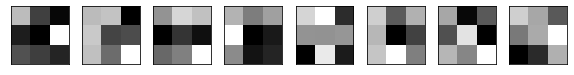

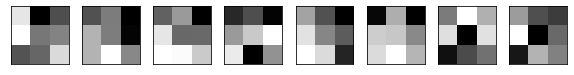

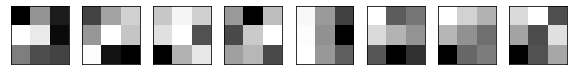

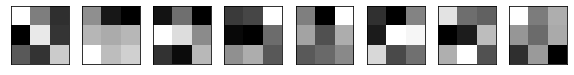

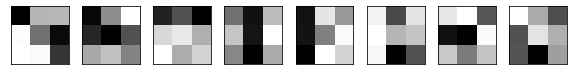

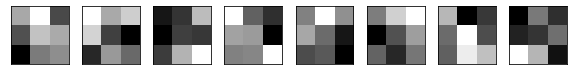

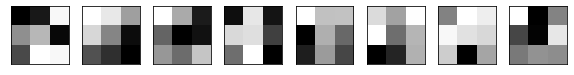

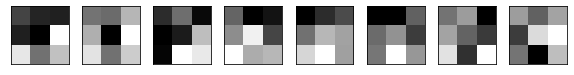

In [45]:
show_filter(filters_mid, 8)

In [0]:
show_filter(filters)

AttributeError: ignored

> # Feature Map

In [62]:
# Extracts the outputs of the top 12 layers
#layer_outputs = [layer.output for layer in prev_ai_kea.layers[:-1]]
ixs = [31, 179, -1]
#layer_outputs = [prev_ai_kea.layers[i].output for i in ixs]

# Creates a model that will return these outputs, given the model input
# 새로운 모델 생성, 기존 모델의 parameter까지 copy, compile하면 안됨, 기존모델과 독립
fm_model = tf.keras.Model(inputs=prev_ai_kea.inputs, outputs=prev_ai_kea.layers[2].output) #conv2d_6 (Conv2D)   

fm_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 111, 111, 32)      864       
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      96        
Total params: 960
Trainable params: 896
Non-trainable params: 64
_________________________________________________________________


- Image Plotting Function

In [0]:
# plot n x n images
def square(imgs, n):
    img_num = n
    plt.figure(figsize=(10,10))
    for i in range(n):
        for j in range(n):
            p_num = i*n + j         
            # specify subplot and turn of axis
            ax = plt.subplot(n, n, p_num+1)   # pic position num: 1 ~ 64
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(imgs[:, :, p_num], cmap='gray')
  # show the figure
    plt.show()

In [0]:
from tensorflow.keras.preprocessing import image
import tensorflow.keras.applications.inception_v3 as incep

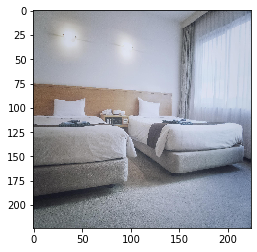

In [65]:
img = image.load_img('/content/room/bedroom/bedroom040.jpg', target_size=(224, 224))
# check image
plt.imshow(img)
# convert the image to an array
img = image.img_to_array(img)         # tf.keras.processing
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)     # numpy
# prepare the image (e.g. scale pixel values for the vgg)
img = incep.preprocess_input(img)     # VGG16.preprocess_input

In [0]:
# Returns a list of five Numpy arrays of layer activation
feature_maps = fm_model.predict(img) 
layers_names = fm_model.output_names

(111, 111, 32)
batch_normalization


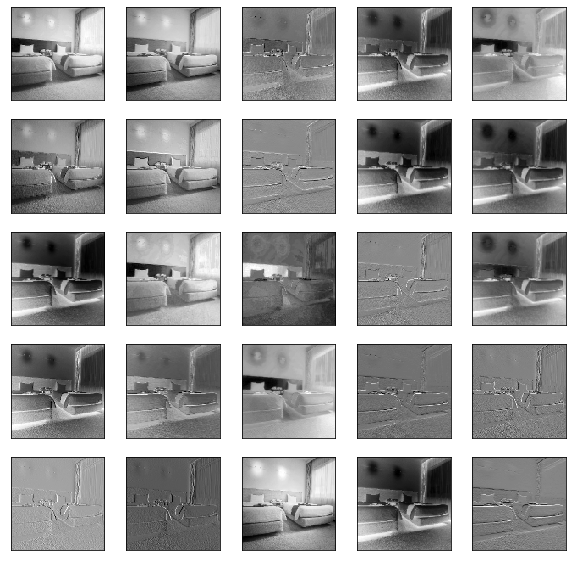

In [68]:
# plot the output from each block
for i, fmap in enumerate(feature_maps):
    print(fmap.shape)
    print(layers_names[i])
    square(fmap, 5)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 111, 111, 32)      864       
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      96        
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0   

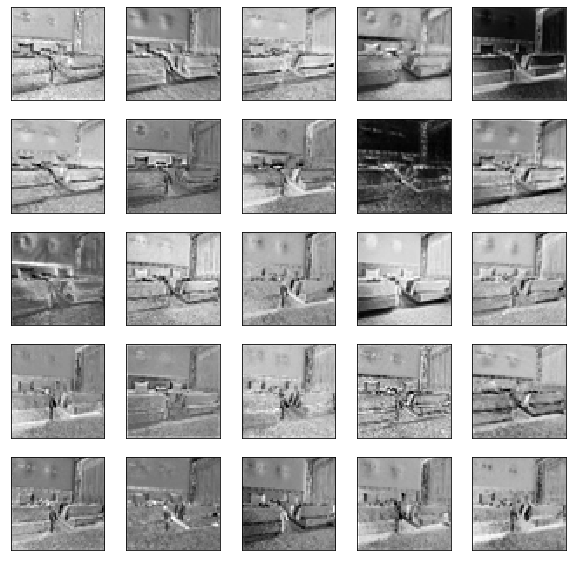

In [75]:
fm_model = tf.keras.Model(inputs=prev_ai_kea.inputs, outputs=prev_ai_kea.layers[12].output) #conv2d_6 (Conv2D)   
fm_model.summary()

feature_maps = fm_model.predict(img) 
layers_names = fm_model.output_names

for i, fmap in enumerate(feature_maps):
    print(fmap.shape)
    print(layers_names[i])
    square(fmap, 5)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 111, 111, 32)      864       
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      96        
_________________________________________________________________
activation (Activation)      (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      96        
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0  

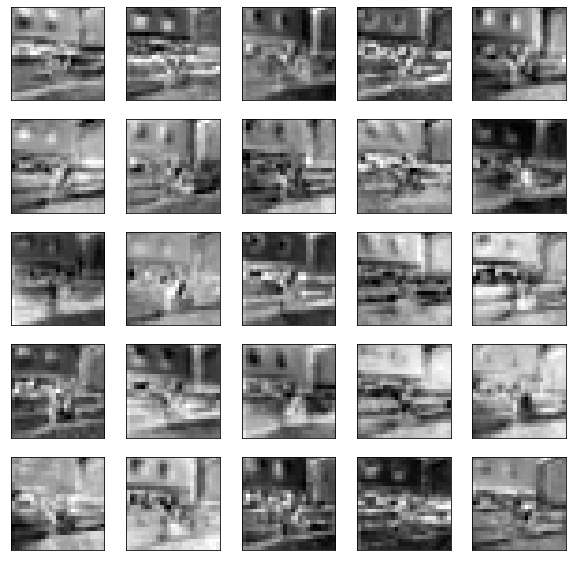

In [76]:
fm_model = tf.keras.Model(inputs=prev_ai_kea.inputs, outputs=prev_ai_kea.layers[21].output) #conv2d_6 (Conv2D)   
fm_model.summary()

feature_maps = fm_model.predict(img) 
layers_names = fm_model.output_names

for i, fmap in enumerate(feature_maps):
    print(fmap.shape)
    print(layers_names[i])
    square(fmap, 5)

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
___________________________________________________________________________________________

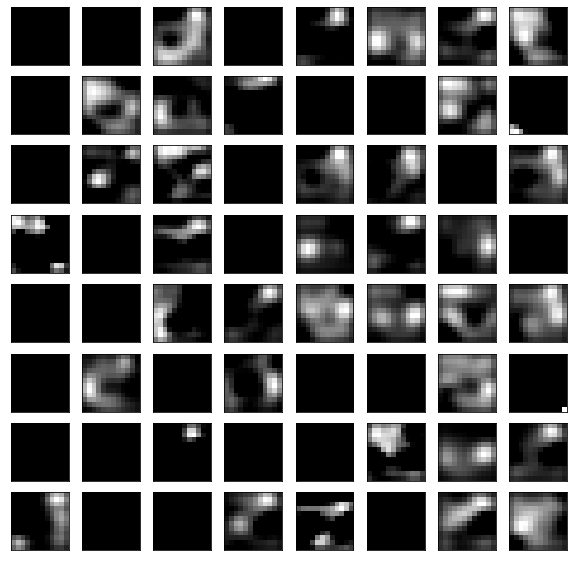

In [78]:
fm_model = tf.keras.Model(inputs=prev_ai_kea.inputs, outputs=prev_ai_kea.layers[-4].output) #conv2d_6 (Conv2D)   
fm_model.summary()

feature_maps = fm_model.predict(img) 
layers_names = fm_model.output_names

for i, fmap in enumerate(feature_maps):
    print(fmap.shape)
    print(layers_names[i])
    square(fmap, 8)

# PLOT LEARNING

In [0]:
print(np.max(history.history['val_accuracy']))

In [0]:
plot_loss()

In [0]:
plot_acc()

# CAM

In [0]:
import cv2
import matplotlib.patches as patches
from keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing import image
import tensorflow.keras.applications.inception_v3 as incep

def buildCAM(img_path, img_alpha, heatmap_alpha, aikea_model=prev_ai_kea): # 0<= alpha <=1

    # load the image with the required shape
    img = image.load_img(img_path, target_size=(img_size, img_size))
    # check image
    plt.imshow(img)
    # convert the image to an array
    img = image.img_to_array(img)         # tf.keras.processing
    # expand dimensions so that it represents a single 'sample'
    img = np.expand_dims(img, axis=0)     # numpy
    # prepare the image (e.g. scale pixel values for the vgg)
    img = incep.preprocess_input(img)     # VGG16.preprocess_input

    grad_model = tf.keras.models.Model(
        [aikea_model.inputs],                           # input: vgg16 inputs
        [aikea_model.get_layer('conv_feat').output,  # outputs: vgg16 last conv
        aikea_model.output]                           # softmax out
    )

    # GradientTape 설정
    with tf.GradientTape() as tape:
        conv_outputs, predict = grad_model(img)   # feature, predict
        class_out = predict[:, np.argmax(predict[0])]    # class     
    print(predict[0])

    # feature map
    output = conv_outputs[0]

    # Get gradient for input image
    grads = tape.gradient(class_out, conv_outputs)[0]

    # check grads' shape
    print('grads', grads.shape, output.shape)

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=(0, 1))

    
    # Build a map of filters according to gradients importance
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    for index, w in enumerate(weights):
        print(w)
        cam += w * output[:, :, index]

    # check cam shape
    print('cam', cam.shape, weights.shape)
    print(cam)


    # image read: ndarray type
    img = cv2.imread(img_path)
    # GBR -> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

    plt.imshow(img)

    print('img', img.shape, type(img))


    # resize cam
    cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
    cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
    # heatmap : minmax normalized one
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    # convert heatmap to rgb
    heatmap = np.uint8(255 * heatmap)                       # RGB range (0~255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB
    
    # get heatmap outline
    heatlist = heatmap.tolist()
    t_pos = []
    for i in range(len(heatlist)):
      for j in range(len(heatlist[i])):
        if heatlist[i][j][2]<200: t_pos.append((i, j))

    y_max = max([i[0] for i in t_pos])
    y_min = min([i[0] for i in t_pos])
    x_max = max([i[1] for i in t_pos])
    x_min = min([i[1] for i in t_pos])

    # check heatmap shape
    plt.imshow(heatmap)
    heatmap.shape #(426, 640, 3)

    # blending heatmap: image: 100%, heatmap: 50%
    output_image = cv2.addWeighted(img.astype('uint8'), img_alpha,  # 1: 100%
                                  heatmap, heatmap_alpha,            # 0.5: 50%
                                  0)
    
    
    return predict[0], output_image, y_min, x_min, (y_max-y_min), (x_max-x_min)

In [0]:
img_path = '/content/furniture/floor lamp/floor_lamp (11).jpg'

In [0]:
import cv2
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

# define Model
pred_list=[]
pred_list, output_image, yy, xx, h, w = buildCAM(img_path, 1, 0.2)
pred_cls = class_name[np.argmax(pred_list)]
print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=12, color='w')
ax.imshow(output_image)